In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
penguins = sns.load_dataset('penguins')

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins.shape

(344, 7)

In [ ]:
penguins.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [ ]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [ ]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [ ]:
penguins['island'].value_counts()

,count
island,
Biscoe,168
Dream,124
Torgersen,52


In [ ]:
penguins['sex'].value_counts(dropna=False)

,count
sex,
Male,168
Female,165
NaN,11


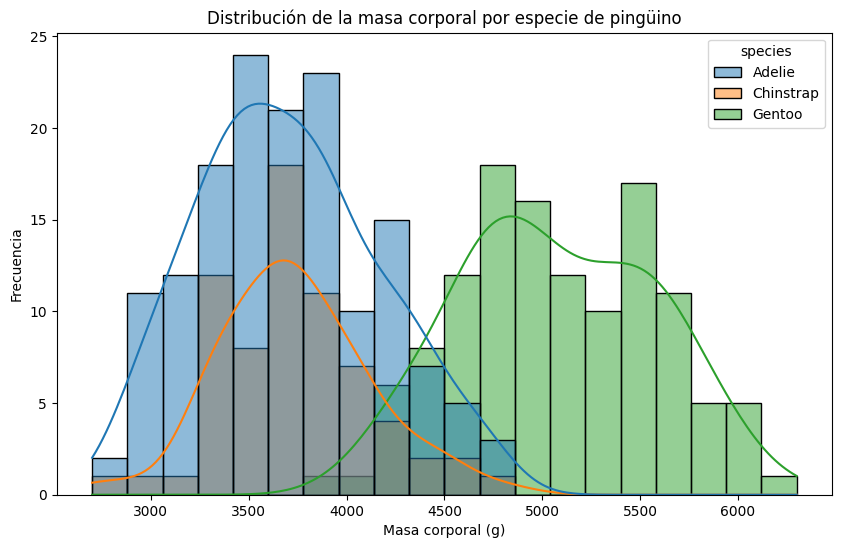

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=penguins, x='body_mass_g', hue='species', kde=True, bins=20)
plt.title("Distribución de la masa corporal por especie de pingüino")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()

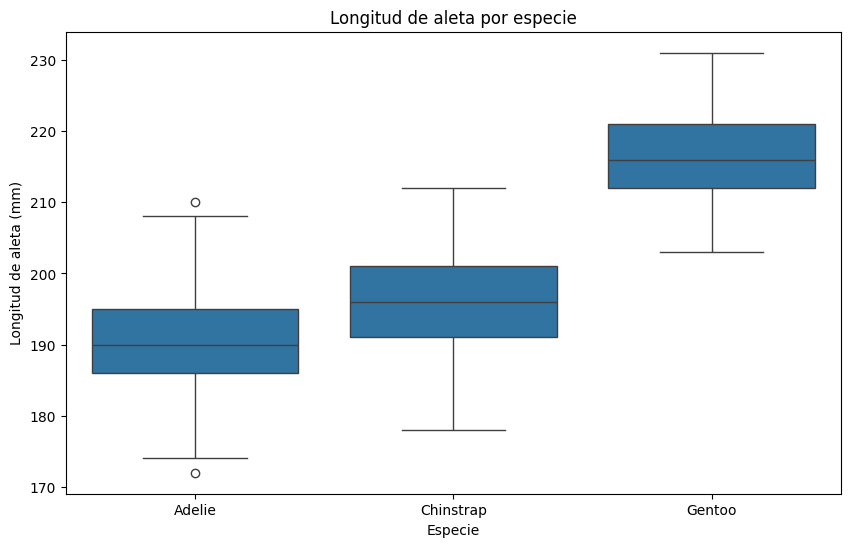

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins, x='species', y='flipper_length_mm')
plt.title("Longitud de aleta por especie")
plt.xlabel("Especie")
plt.ylabel("Longitud de aleta (mm)")
plt.show()

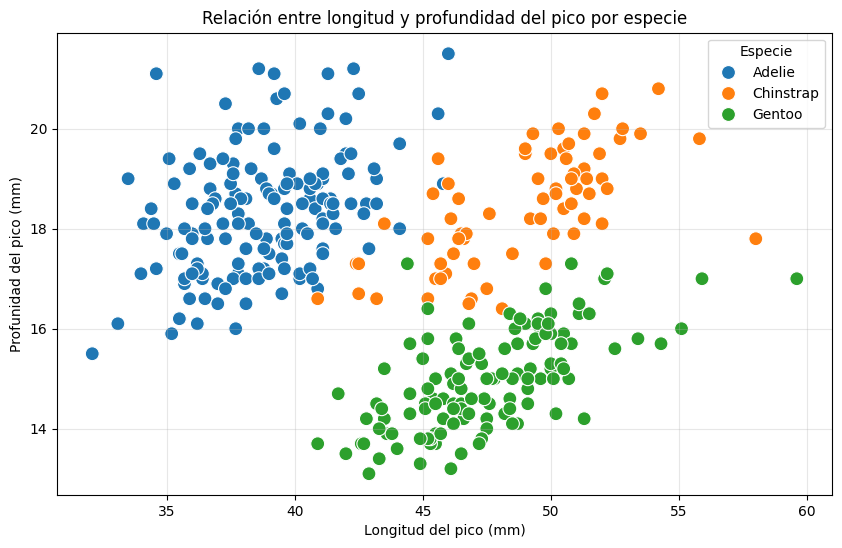

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', s=100)
plt.title("Relación entre longitud y profundidad del pico por especie")
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Profunidad del pico (mm)")
plt.legend(title='Especie')
plt.grid(True, alpha=0.3)
plt.show()

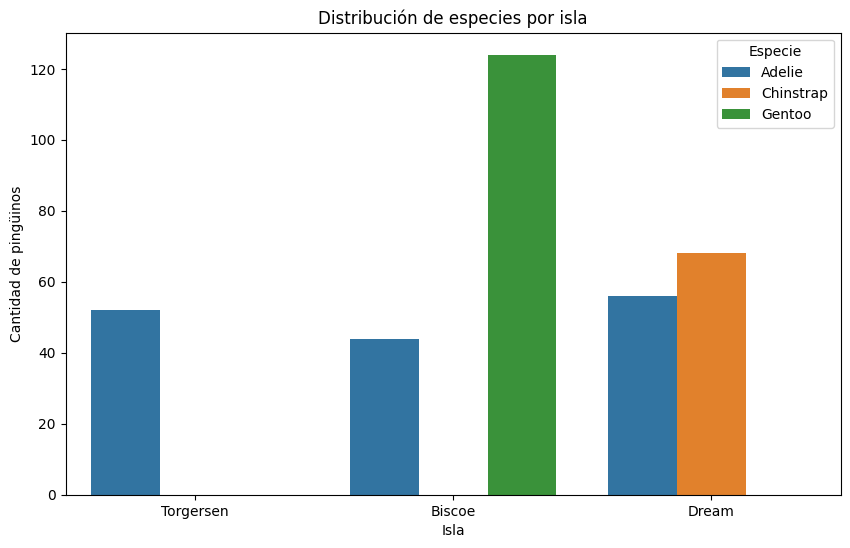

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='island', hue='species')
plt.title("Distribución de especies por isla")
plt.xlabel("Isla")
plt.ylabel("Cantidad de pingüinos")
plt.legend(title='Especie')
plt.show()

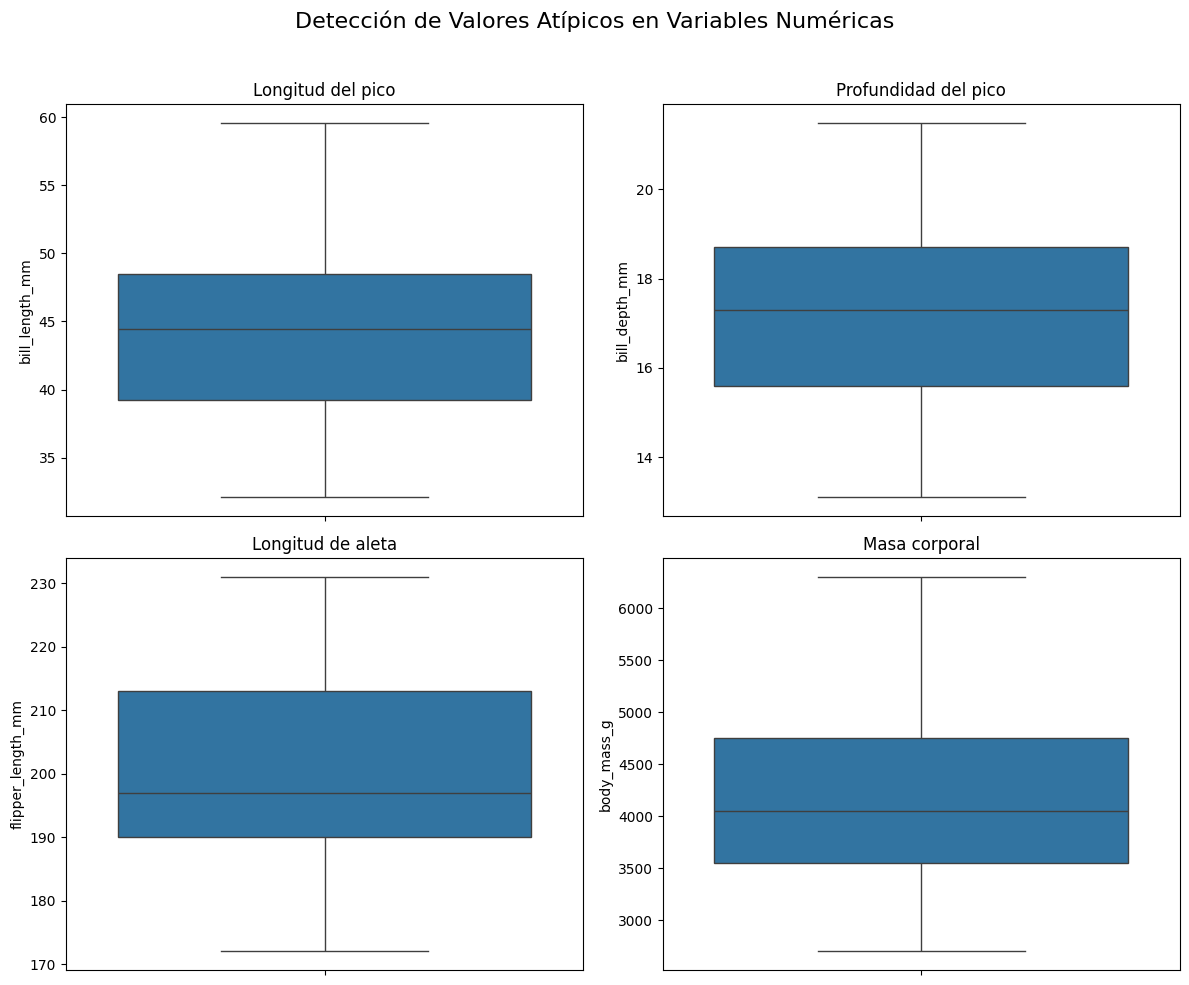

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Detección de Valores Atípicos en Variables Numéricas', fontsize=16)

sns.boxplot(ax=axes[0, 0], data=penguins, y='bill_length_mm')
axes[0, 0].set_title('Longitud del pico')

sns.boxplot(ax=axes[0, 1], data=penguins, y='bill_depth_mm')
axes[0, 1].set_title('Profundidad del pico')

sns.boxplot(ax=axes[1, 0], data=penguins, y='flipper_length_mm')
axes[1, 0].set_title('Longitud de aleta')

sns.boxplot(ax=axes[1, 1], data=penguins, y='body_mass_g')
axes[1, 1].set_title('Masa corporal')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
!pip install missingno

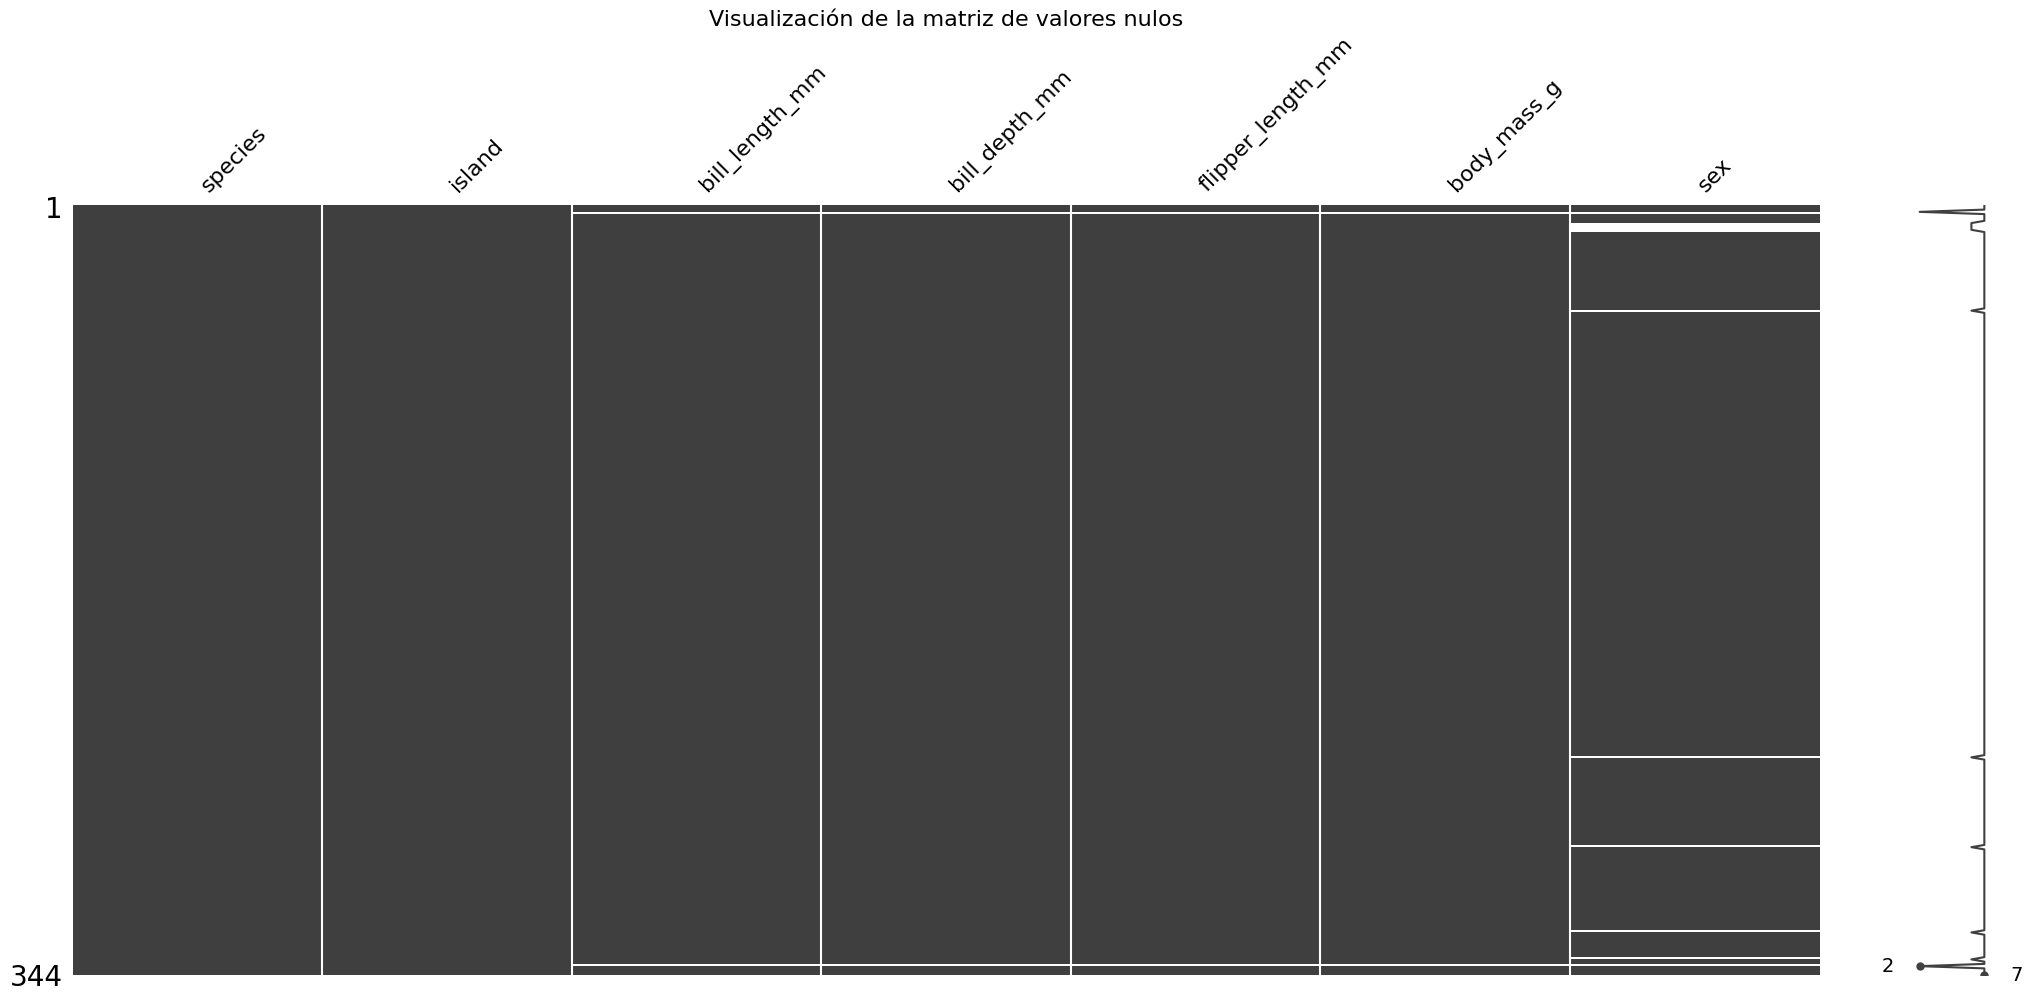

In [ ]:
import missingno as msno

msno.matrix(penguins)
plt.title("Visualización de la matriz de valores nulos", fontsize=16)
plt.show()

In [ ]:
# ¿Cuántos pingüinos hay por sexo en cada especie?
conteo_sexo_especie = pd.crosstab(penguins['species'], penguins['sex'])
print(conteo_sexo_especie)

sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61


In [ ]:
# ¿Existe correlación entre la masa corporal y la longitud de la aleta?
correlacion = penguins[['body_mass_g', 'flipper_length_mm']].corr()
print(correlacion)

                   body_mass_g  flipper_length_mm
body_mass_g           1.000000           0.871202
flipper_length_mm     0.871202           1.000000


In [ ]:
#¿Qué isla tiene la mayor diversidad de especies?
diversidad_islas = penguins.groupby('island')['species'].nunique().sort_values(ascending=False)
print(diversidad_islas)

island
Biscoe       2
Dream        2
Torgersen    1
Name: species, dtype: int64


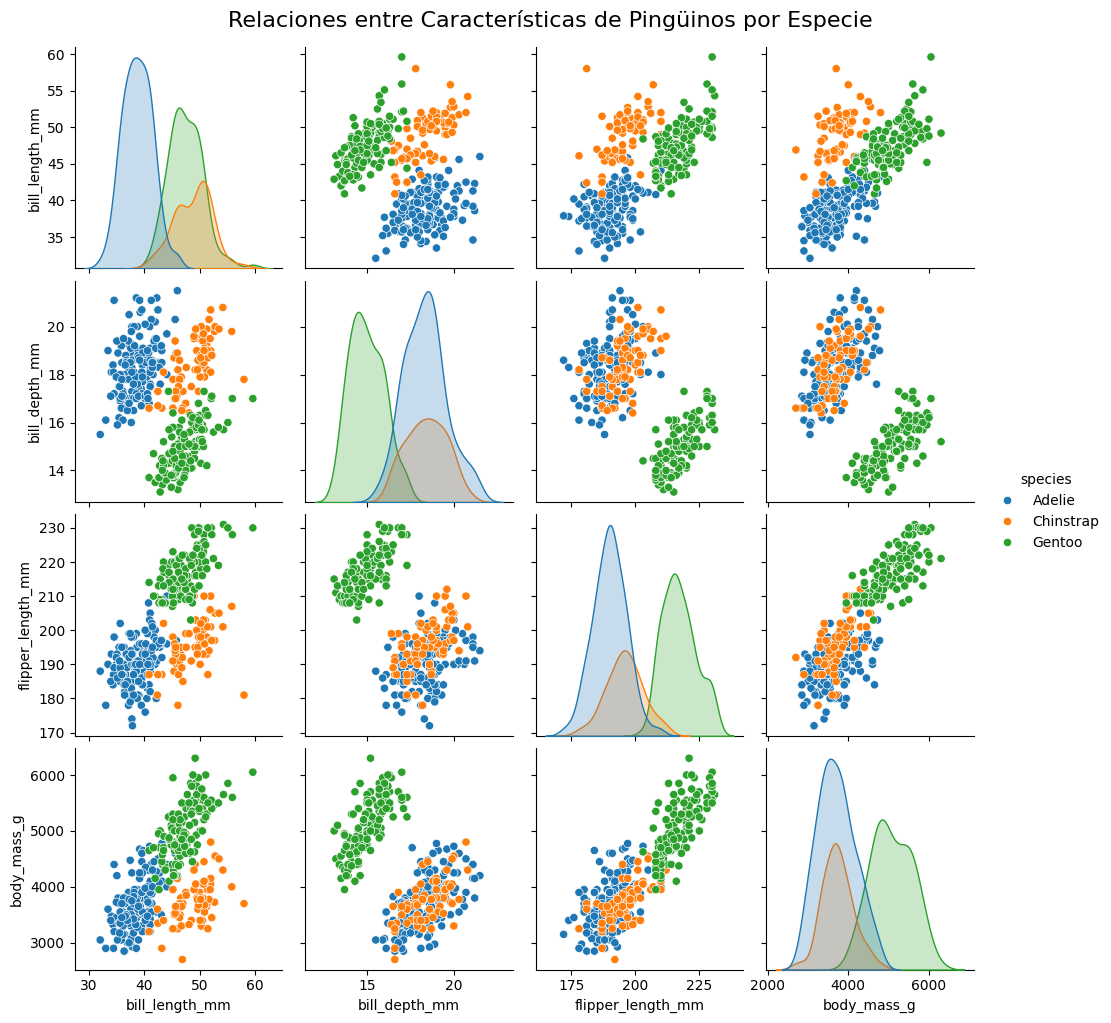

In [ ]:
sns.pairplot(penguins, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle('Relaciones entre Características de Pingüinos por Especie', y=1.02, fontsize=16)
plt.show()

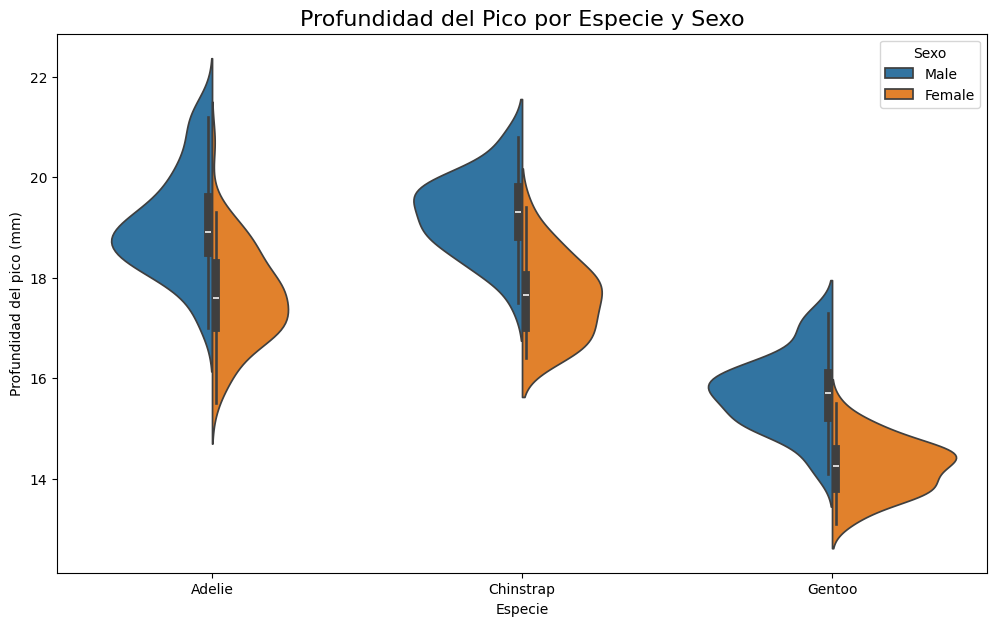

In [ ]:
# El gráfico de violín muestra la distribución y densidad de los datos
plt.figure(figsize=(12, 7))
sns.violinplot(data=penguins, x='species', y='bill_depth_mm', hue='sex', split=True)
plt.title('Profundidad del Pico por Especie y Sexo', fontsize=16)
plt.xlabel('Especie')
plt.ylabel('Profundidad del pico (mm)')
plt.legend(title='Sexo')
plt.show()